<a href="https://colab.research.google.com/github/CommoditiesAgricolasInteligentes/codigo-fonte/blob/main/dados_sinteticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória de Dados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

## Verificando e limpando o dataset

In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/modelos/dataset.csv')
dados

,Unnamed: 0,AREA_AGRI_AUS,AREA_AGRI_BRA,AREA_AGRI_CAN,AREA_AGRI_CHN,AREA_AGRI_DEU,AREA_AGRI_EGY,AREA_AGRI_FRA,AREA_AGRI_GBR,AREA_AGRI_IDN,AREA_AGRI_IND,AREA_AGRI_PHL,AREA_AGRI_RUS,AREA_AGRI_TUR,AREA_AGRI_USA,CRES_POP_AUS,CRES_POP_BRA,CRES_POP_CAN,CRES_POP_CHN,CRES_POP_DEU,CRES_POP_EGY,CRES_POP_FRA,CRES_POP_GBR,CRES_POP_IDN,CRES_POP_IND,CRES_POP_PHL,CRES_POP_RUS,CRES_POP_TUR,CRES_POP_USA,INFLACAO_AUS,INFLACAO_BRA,INFLACAO_CAN,INFLACAO_CHN,INFLACAO_DEU,INFLACAO_EGY,INFLACAO_FRA,INFLACAO_GBR,INFLACAO_IDN,INFLACAO_IND,INFLACAO_PHL,...,TRIGO_EXPORT_CHN,TRIGO_EXPORT_EGY,TRIGO_EXPORT_IND,TRIGO_EXPORT_IDN,TRIGO_EXPORT_PHL,TRIGO_EXPORT_RUS,TRIGO_EXPORT_TUR,TRIGO_EXPORT_GBR,TRIGO_EXPORT_USA,TRIGO_IMPORT_AUS,TRIGO_IMPORT_BRA,TRIGO_IMPORT_CAN,TRIGO_IMPORT_EGY,TRIGO_IMPORT_IND,TRIGO_IMPORT_IDN,TRIGO_IMPORT_PHL,TRIGO_IMPORT_RUS,TRIGO_IMPORT_TUR,TRIGO_IMPORT_GBR,TRIGO_IMPORT_USA,TRIGO_IMPORT_DEU,TRIGO_IMPORT_FRA,TRIGO_IMPORT_HKG,TRIGO_IMPORT_MAC,TRIGO_IMPORT_TWN,TRIGO_IMPORT_CHN,TRIGO_PROD_AUS,TRIGO_PROD_BRA,TRIGO_PROD_CAN,TRIGO_PROD_CHN,TRIGO_PROD_EGY,TRIGO_PROD_IND,TRIGO_PROD_IDN,TRIGO_PROD_PHL,TRIGO_PROD_RUS,TRIGO_PROD_TUR,TRIGO_PROD_GBR,TRIGO_PROD_USA,PRECO_PETROLEO,TRIGO_PRECO
0,0,60.896151,27.373333,6.839325,53.422560,51.682754,2.866543,56.005760,74.965899,23.180722,60.536663,37.025858,13.166160,50.148773,46.615336,1.989740,2.911114,2.001122,-1.015528,0.769854,2.716314,1.318629,0.760460,2.639835,1.998439,3.336629,1.110602,2.425790,1.657730,3.728814,101.725073,1.358696,7.233836,1.536612,0.332829,4.139936,1.003576,39.590444,1.779878,4.154822,...,2,5,0,0,0,0,1,0,17799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,7450,350,14108,20960,1499,10320,0,0,0,7000,0,36877,2.88,1.9554
1,1,61.763332,18.779178,6.897817,36.420045,55.495088,2.579738,63.077328,81.841855,21.307485,58.843195,25.859988,13.166160,47.447475,48.860242,1.989740,2.911114,2.001122,-1.015528,0.769854,2.716314,1.318629,0.760460,2.639835,1.998439,3.336629,1.110602,2.425790,1.657730,2.287582,101.725073,1.018767,7.233836,2.293676,0.693607,2.400461,3.447496,13.691932,1.695213,1.595633,...,122,6,0,0,0,0,1,0,19486,0.0,138890.0,10.0,41480.0,246460.0,0.0,16860.0,0.0,62190.0,282630.0,11490.0,285390.0,48800.0,6050.0,5.0,19410.0,283000.0,6727,250,7713,14250,1436,10995,0,0,0,6336,0,33557,2.89,2.0091
2,2,62.037792,19.222698,6.946559,36.712150,55.546645,2.516450,62.896528,81.755053,21.307485,59.357794,26.124858,13.166160,47.617686,48.476137,2.440639,2.921449,1.859888,0.820456,0.879432,2.689561,1.396523,0.848661,2.650489,2.031905,3.317899,1.111455,2.407716,1.537997,-0.319489,101.725073,1.061571,7.233836,2.843280,-3.003077,5.331280,4.196499,131.397849,3.632215,5.796652,...,89,15,0,0,0,0,0,0,17663,0.0,160950.0,20.0,60270.0,262213.0,0.0,22740.0,0.0,50650.0,291561.0,8280.0,314840.0,50950.0,7820.0,20.0,19220.0,268000.0,8353,256,15392,16665,1593,12076,0,0,0,6804,0,29719,2.89,2.0897
3,3,62.399227,19.666218,6.995301,37.014865,55.572423,2.501381,62.739469,81.622783,21.279884,59.247475,26.393080,13.166160,48.555800,48.197940,1.917816,2.908779,1.862846,2.457647,0.925875,2.664519,1.404858,0.748366,2.663063,2.056910,3.276823,1.110532,2.393811,1.439165,0.641026,101.725073,1.628151,7.233836,2.966961,0.746646,4.999153,2.018544,145.910781,2.946161,5.625549,...,113,19,0,0,0,0,0,0,23024,0.0,164000.0,0.0,72270.0,303301.0,0.0,27265.0,0.0,57820.0,289730.0,9310.0,201720.0,53370.0,5850.0,120.0,27770.0,419000.0,8925,100,19690,18475,1493,10779,0,0,0,7892,0,31216,2.89,2.0022
4,4,62.729106,20.109737,7.044043,37.317474,55.732822,2.517454,62.292034,81.440913,21.279884,59.435152,27.331858,13.166160,48.454452,47.932516,1.962354,2.868020,1.885715,2.320683,0.805141,2.643836,1.324914,0.650258,2.680609,2.071544,3.208808,1.111100,2.385353,1.389046,2.866242,101.725073,1.912145,7.233836,2.335728,3.660983,3.211192,3.281587,108.994709,13.355261,8.183079,...,115,12,0,0,0,0,0,0,19677,0.0,209560.0,0.0,70090.0,447432.0,0.0,23640.0,0.0,6130.0,288580.0,5704.0,220140.0,51870.0,7010.0,50.0,23620.0,424000.0,10037,226,16349

In [ ]:
#dados.columns.values[0] = 'Ano_n'
dados.drop(columns='Unnamed: 0', inplace=True)
dados

,AREA_AGRI_AUS,AREA_AGRI_BRA,AREA_AGRI_CAN,AREA_AGRI_CHN,AREA_AGRI_DEU,AREA_AGRI_EGY,AREA_AGRI_FRA,AREA_AGRI_GBR,AREA_AGRI_IDN,AREA_AGRI_IND,AREA_AGRI_PHL,AREA_AGRI_RUS,AREA_AGRI_TUR,AREA_AGRI_USA,CRES_POP_AUS,CRES_POP_BRA,CRES_POP_CAN,CRES_POP_CHN,CRES_POP_DEU,CRES_POP_EGY,CRES_POP_FRA,CRES_POP_GBR,CRES_POP_IDN,CRES_POP_IND,CRES_POP_PHL,CRES_POP_RUS,CRES_POP_TUR,CRES_POP_USA,INFLACAO_AUS,INFLACAO_BRA,INFLACAO_CAN,INFLACAO_CHN,INFLACAO_DEU,INFLACAO_EGY,INFLACAO_FRA,INFLACAO_GBR,INFLACAO_IDN,INFLACAO_IND,INFLACAO_PHL,INFLACAO_RUS,...,TRIGO_EXPORT_CHN,TRIGO_EXPORT_EGY,TRIGO_EXPORT_IND,TRIGO_EXPORT_IDN,TRIGO_EXPORT_PHL,TRIGO_EXPORT_RUS,TRIGO_EXPORT_TUR,TRIGO_EXPORT_GBR,TRIGO_EXPORT_USA,TRIGO_IMPORT_AUS,TRIGO_IMPORT_BRA,TRIGO_IMPORT_CAN,TRIGO_IMPORT_EGY,TRIGO_IMPORT_IND,TRIGO_IMPORT_IDN,TRIGO_IMPORT_PHL,TRIGO_IMPORT_RUS,TRIGO_IMPORT_TUR,TRIGO_IMPORT_GBR,TRIGO_IMPORT_USA,TRIGO_IMPORT_DEU,TRIGO_IMPORT_FRA,TRIGO_IMPORT_HKG,TRIGO_IMPORT_MAC,TRIGO_IMPORT_TWN,TRIGO_IMPORT_CHN,TRIGO_PROD_AUS,TRIGO_PROD_BRA,TRIGO_PROD_CAN,TRIGO_PROD_CHN,TRIGO_PROD_EGY,TRIGO_PROD_IND,TRIGO_PROD_IDN,TRIGO_PROD_PHL,TRIGO_PROD_RUS,TRIGO_PROD_TUR,TRIGO_PROD_GBR,TRIGO_PROD_USA,PRECO_PETROLEO,TRIGO_PRECO
0,60.896151,27.373333,6.839325,53.422560,51.682754,2.866543,56.005760,74.965899,23.180722,60.536663,37.025858,13.166160,50.148773,46.615336,1.989740,2.911114,2.001122,-1.015528,0.769854,2.716314,1.318629,0.760460,2.639835,1.998439,3.336629,1.110602,2.425790,1.657730,3.728814,101.725073,1.358696,7.233836,1.536612,0.332829,4.139936,1.003576,39.590444,1.779878,4.154822,874.245720,...,2,5,0,0,0,0,1,0,17799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,7450,350,14108,20960,1499,10320,0,0,0,7000,0,36877,2.88,1.9554
1,61.763332,18.779178,6.897817,36.420045,55.495088,2.579738,63.077328,81.841855,21.307485,58.843195,25.859988,13.166160,47.447475,48.860242,1.989740,2.911114,2.001122,-1.015528,0.769854,2.716314,1.318629,0.760460,2.639835,1.998439,3.336629,1.110602,2.425790,1.657730,2.287582,101.725073,1.018767,7.233836,2.293676,0.693607,2.400461,3.447496,13.691932,1.695213,1.595633,874.245720,...,122,6,0,0,0,0,1,0,19486,0.0,138890.0,10.0,41480.0,246460.0,0.0,16860.0,0.0,62190.0,282630.0,11490.0,285390.0,48800.0,6050.0,5.0,19410.0,283000.0,6727,250,7713,14250,1436,10995,0,0,0,6336,0,33557,2.89,2.0091
2,62.037792,19.222698,6.946559,36.712150,55.546645,2.516450,62.896528,81.755053,21.307485,59.357794,26.124858,13.166160,47.617686,48.476137,2.440639,2.921449,1.859888,0.820456,0.879432,2.689561,1.396523,0.848661,2.650489,2.031905,3.317899,1.111455,2.407716,1.537997,-0.319489,101.725073,1.061571,7.233836,2.843280,-3.003077,5.331280,4.196499,131.397849,3.632215,5.796652,874.245720,...,89,15,0,0,0,0,0,0,17663,0.0,160950.0,20.0,60270.0,262213.0,0.0,22740.0,0.0,50650.0,291561.0,8280.0,314840.0,50950.0,7820.0,20.0,19220.0,268000.0,8353,256,15392,16665,1593,12076,0,0,0,6804,0,29719,2.89,2.0897
3,62.399227,19.666218,6.995301,37.014865,55.572423,2.501381,62.739469,81.622783,21.279884,59.247475,26.393080,13.166160,48.555800,48.197940,1.917816,2.908779,1.862846,2.457647,0.925875,2.664519,1.404858,0.748366,2.663063,2.056910,3.276823,1.110532,2.393811,1.439165,0.641026,101.725073,1.628151,7.233836,2.966961,0.746646,4.999153,2.018544,145.910781,2.946161,5.625549,874.245720,...,113,19,0,0,0,0,0,0,23024,0.0,164000.0,0.0,72270.0,303301.0,0.0,27265.0,0.0,57820.0,289730.0,9310.0,201720.0,53370.0,5850.0,120.0,27770.0,419000.0,8925,100,19690,18475,1493,10779,0,0,0,7892,0,31216,2.89,2.0022
4,62.729106,20.109737,7.044043,37.317474,55.732822,2.517454,62.292034,81.440913,21.279884,59.435152,27.331858,13.166160,48.454452,47.932516,1.962354,2.868020,1.885715,2.320683,0.805141,2.643836,1.324914,0.650258,2.680609,2.071544,3.208808,1.111100,2.385353,1.389046,2.866242,101.725073,1.912145,7.233836,2.335728,3.660983,3.211192,3.281587,108.994709,13.355261,8.183079,874.245720,...,115,12,0,0,0,0,0,0,19677,0.0,209560.0,0.0,70090.0,447432.0,0.0,23640.0,0.0,6130.0,288580.0,5704.0,220140.0,51870

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Incluindo uma variável dummy com o número sequencial da observação, representando a passagem do tempo
ANO_N = pd.Series([n for n in range(1961, 2022)])
ANO_N.name = 'ANO_N'
ANO_N

0     1961
1     1962
2     1963
3     1964
4     1965
      ... 
56    2017
57    2018
58    2019
59    2020
60    2021
Name: ANO_N, Length: 61, dtype: int64

In [ ]:
dados = pd.concat([ANO_N, dados], axis=1)
dados

,ANO_N,AREA_AGRI_AUS,AREA_AGRI_BRA,AREA_AGRI_CAN,AREA_AGRI_CHN,AREA_AGRI_DEU,AREA_AGRI_EGY,AREA_AGRI_FRA,AREA_AGRI_GBR,AREA_AGRI_IDN,AREA_AGRI_IND,AREA_AGRI_PHL,AREA_AGRI_RUS,AREA_AGRI_TUR,AREA_AGRI_USA,CRES_POP_AUS,CRES_POP_BRA,CRES_POP_CAN,CRES_POP_CHN,CRES_POP_DEU,CRES_POP_EGY,CRES_POP_FRA,CRES_POP_GBR,CRES_POP_IDN,CRES_POP_IND,CRES_POP_PHL,CRES_POP_RUS,CRES_POP_TUR,CRES_POP_USA,INFLACAO_AUS,INFLACAO_BRA,INFLACAO_CAN,INFLACAO_CHN,INFLACAO_DEU,INFLACAO_EGY,INFLACAO_FRA,INFLACAO_GBR,INFLACAO_IDN,INFLACAO_IND,INFLACAO_PHL,...,TRIGO_EXPORT_CHN,TRIGO_EXPORT_EGY,TRIGO_EXPORT_IND,TRIGO_EXPORT_IDN,TRIGO_EXPORT_PHL,TRIGO_EXPORT_RUS,TRIGO_EXPORT_TUR,TRIGO_EXPORT_GBR,TRIGO_EXPORT_USA,TRIGO_IMPORT_AUS,TRIGO_IMPORT_BRA,TRIGO_IMPORT_CAN,TRIGO_IMPORT_EGY,TRIGO_IMPORT_IND,TRIGO_IMPORT_IDN,TRIGO_IMPORT_PHL,TRIGO_IMPORT_RUS,TRIGO_IMPORT_TUR,TRIGO_IMPORT_GBR,TRIGO_IMPORT_USA,TRIGO_IMPORT_DEU,TRIGO_IMPORT_FRA,TRIGO_IMPORT_HKG,TRIGO_IMPORT_MAC,TRIGO_IMPORT_TWN,TRIGO_IMPORT_CHN,TRIGO_PROD_AUS,TRIGO_PROD_BRA,TRIGO_PROD_CAN,TRIGO_PROD_CHN,TRIGO_PROD_EGY,TRIGO_PROD_IND,TRIGO_PROD_IDN,TRIGO_PROD_PHL,TRIGO_PROD_RUS,TRIGO_PROD_TUR,TRIGO_PROD_GBR,TRIGO_PROD_USA,PRECO_PETROLEO,TRIGO_PRECO
0,1961,60.896151,27.373333,6.839325,53.422560,51.682754,2.866543,56.005760,74.965899,23.180722,60.536663,37.025858,13.166160,50.148773,46.615336,1.989740,2.911114,2.001122,-1.015528,0.769854,2.716314,1.318629,0.760460,2.639835,1.998439,3.336629,1.110602,2.425790,1.657730,3.728814,101.725073,1.358696,7.233836,1.536612,0.332829,4.139936,1.003576,39.590444,1.779878,4.154822,...,2,5,0,0,0,0,1,0,17799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,7450,350,14108,20960,1499,10320,0,0,0,7000,0,36877,2.88,1.9554
1,1962,61.763332,18.779178,6.897817,36.420045,55.495088,2.579738,63.077328,81.841855,21.307485,58.843195,25.859988,13.166160,47.447475,48.860242,1.989740,2.911114,2.001122,-1.015528,0.769854,2.716314,1.318629,0.760460,2.639835,1.998439,3.336629,1.110602,2.425790,1.657730,2.287582,101.725073,1.018767,7.233836,2.293676,0.693607,2.400461,3.447496,13.691932,1.695213,1.595633,...,122,6,0,0,0,0,1,0,19486,0.0,138890.0,10.0,41480.0,246460.0,0.0,16860.0,0.0,62190.0,282630.0,11490.0,285390.0,48800.0,6050.0,5.0,19410.0,283000.0,6727,250,7713,14250,1436,10995,0,0,0,6336,0,33557,2.89,2.0091
2,1963,62.037792,19.222698,6.946559,36.712150,55.546645,2.516450,62.896528,81.755053,21.307485,59.357794,26.124858,13.166160,47.617686,48.476137,2.440639,2.921449,1.859888,0.820456,0.879432,2.689561,1.396523,0.848661,2.650489,2.031905,3.317899,1.111455,2.407716,1.537997,-0.319489,101.725073,1.061571,7.233836,2.843280,-3.003077,5.331280,4.196499,131.397849,3.632215,5.796652,...,89,15,0,0,0,0,0,0,17663,0.0,160950.0,20.0,60270.0,262213.0,0.0,22740.0,0.0,50650.0,291561.0,8280.0,314840.0,50950.0,7820.0,20.0,19220.0,268000.0,8353,256,15392,16665,1593,12076,0,0,0,6804,0,29719,2.89,2.0897
3,1964,62.399227,19.666218,6.995301,37.014865,55.572423,2.501381,62.739469,81.622783,21.279884,59.247475,26.393080,13.166160,48.555800,48.197940,1.917816,2.908779,1.862846,2.457647,0.925875,2.664519,1.404858,0.748366,2.663063,2.056910,3.276823,1.110532,2.393811,1.439165,0.641026,101.725073,1.628151,7.233836,2.966961,0.746646,4.999153,2.018544,145.910781,2.946161,5.625549,...,113,19,0,0,0,0,0,0,23024,0.0,164000.0,0.0,72270.0,303301.0,0.0,27265.0,0.0,57820.0,289730.0,9310.0,201720.0,53370.0,5850.0,120.0,27770.0,419000.0,8925,100,19690,18475,1493,10779,0,0,0,7892,0,31216,2.89,2.0022
4,1965,62.729106,20.109737,7.044043,37.317474,55.732822,2.517454,62.292034,81.440913,21.279884,59.435152,27.331858,13.166160,48.454452,47.932516,1.962354,2.868020,1.885715,2.320683,0.805141,2.643836,1.324914,0.650258,2.680609,2.071544,3.208808,1.111100,2.385353,1.389046,2.866242,101.725073,1.912145,7.233836,2.335728,3.660983,3.211192,3.281587,108.994709,13.355261,8.183079,...,115,12,0,0,0,0,0,0,19677,0.0,209560.0,0.0,70090.0,447432.0,0.0,23640.0,0.0,6130.0,288580.0,5704.0,220140.0,51870.0,7010.0,50.0,23620.0,424000.0,10037

In [ ]:
  # Incluindo variáveis para verificar a autocorrelação com (t-1), (t-3) e (t-5)
  dados['TRIGO_PRECO_T-1'] = dados['TRIGO_PRECO'].shift(periods=1)
  dados['TRIGO_PRECO_T-3'] = dados['TRIGO_PRECO'].shift(periods=3)
  dados['TRIGO_PRECO_T-5'] = dados['TRIGO_PRECO'].shift(periods=5)
dados

,ANO_N,AREA_AGRI_AUS,AREA_AGRI_BRA,AREA_AGRI_CAN,AREA_AGRI_CHN,AREA_AGRI_DEU,AREA_AGRI_EGY,AREA_AGRI_FRA,AREA_AGRI_GBR,AREA_AGRI_IDN,AREA_AGRI_IND,AREA_AGRI_PHL,AREA_AGRI_RUS,AREA_AGRI_TUR,AREA_AGRI_USA,CRES_POP_AUS,CRES_POP_BRA,CRES_POP_CAN,CRES_POP_CHN,CRES_POP_DEU,CRES_POP_EGY,CRES_POP_FRA,CRES_POP_GBR,CRES_POP_IDN,CRES_POP_IND,CRES_POP_PHL,CRES_POP_RUS,CRES_POP_TUR,CRES_POP_USA,INFLACAO_AUS,INFLACAO_BRA,INFLACAO_CAN,INFLACAO_CHN,INFLACAO_DEU,INFLACAO_EGY,INFLACAO_FRA,INFLACAO_GBR,INFLACAO_IDN,INFLACAO_IND,INFLACAO_PHL,...,TRIGO_EXPORT_IDN,TRIGO_EXPORT_PHL,TRIGO_EXPORT_RUS,TRIGO_EXPORT_TUR,TRIGO_EXPORT_GBR,TRIGO_EXPORT_USA,TRIGO_IMPORT_AUS,TRIGO_IMPORT_BRA,TRIGO_IMPORT_CAN,TRIGO_IMPORT_EGY,TRIGO_IMPORT_IND,TRIGO_IMPORT_IDN,TRIGO_IMPORT_PHL,TRIGO_IMPORT_RUS,TRIGO_IMPORT_TUR,TRIGO_IMPORT_GBR,TRIGO_IMPORT_USA,TRIGO_IMPORT_DEU,TRIGO_IMPORT_FRA,TRIGO_IMPORT_HKG,TRIGO_IMPORT_MAC,TRIGO_IMPORT_TWN,TRIGO_IMPORT_CHN,TRIGO_PROD_AUS,TRIGO_PROD_BRA,TRIGO_PROD_CAN,TRIGO_PROD_CHN,TRIGO_PROD_EGY,TRIGO_PROD_IND,TRIGO_PROD_IDN,TRIGO_PROD_PHL,TRIGO_PROD_RUS,TRIGO_PROD_TUR,TRIGO_PROD_GBR,TRIGO_PROD_USA,PRECO_PETROLEO,TRIGO_PRECO,TRIGO_PRECO_T-1,TRIGO_PRECO_T-3,TRIGO_PRECO_T-5
0,1961,60.896151,27.373333,6.839325,53.422560,51.682754,2.866543,56.005760,74.965899,23.180722,60.536663,37.025858,13.166160,50.148773,46.615336,1.989740,2.911114,2.001122,-1.015528,0.769854,2.716314,1.318629,0.760460,2.639835,1.998439,3.336629,1.110602,2.425790,1.657730,3.728814,101.725073,1.358696,7.233836,1.536612,0.332829,4.139936,1.003576,39.590444,1.779878,4.154822,...,0,0,0,1,0,17799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,7450,350,14108,20960,1499,10320,0,0,0,7000,0,36877,2.88,1.9554,NaN,NaN,NaN
1,1962,61.763332,18.779178,6.897817,36.420045,55.495088,2.579738,63.077328,81.841855,21.307485,58.843195,25.859988,13.166160,47.447475,48.860242,1.989740,2.911114,2.001122,-1.015528,0.769854,2.716314,1.318629,0.760460,2.639835,1.998439,3.336629,1.110602,2.425790,1.657730,2.287582,101.725073,1.018767,7.233836,2.293676,0.693607,2.400461,3.447496,13.691932,1.695213,1.595633,...,0,0,0,1,0,19486,0.0,138890.0,10.0,41480.0,246460.0,0.0,16860.0,0.0,62190.0,282630.0,11490.0,285390.0,48800.0,6050.0,5.0,19410.0,283000.0,6727,250,7713,14250,1436,10995,0,0,0,6336,0,33557,2.89,2.0091,1.9554,NaN,NaN
2,1963,62.037792,19.222698,6.946559,36.712150,55.546645,2.516450,62.896528,81.755053,21.307485,59.357794,26.124858,13.166160,47.617686,48.476137,2.440639,2.921449,1.859888,0.820456,0.879432,2.689561,1.396523,0.848661,2.650489,2.031905,3.317899,1.111455,2.407716,1.537997,-0.319489,101.725073,1.061571,7.233836,2.843280,-3.003077,5.331280,4.196499,131.397849,3.632215,5.796652,...,0,0,0,0,0,17663,0.0,160950.0,20.0,60270.0,262213.0,0.0,22740.0,0.0,50650.0,291561.0,8280.0,314840.0,50950.0,7820.0,20.0,19220.0,268000.0,8353,256,15392,16665,1593,12076,0,0,0,6804,0,29719,2.89,2.0897,2.0091,NaN,NaN
3,1964,62.399227,19.666218,6.995301,37.014865,55.572423,2.501381,62.739469,81.622783,21.279884,59.247475,26.393080,13.166160,48.555800,48.197940,1.917816,2.908779,1.862846,2.457647,0.925875,2.664519,1.404858,0.748366,2.663063,2.056910,3.276823,1.110532,2.393811,1.439165,0.641026,101.725073,1.628151,7.233836,2.966961,0.746646,4.999153,2.018544,145.910781,2.946161,5.625549,...,0,0,0,0,0,23024,0.0,164000.0,0.0,72270.0,303301.0,0.0,27265.0,0.0,57820.0,289730.0,9310.0,201720.0,53370.0,5850.0,120.0,27770.0,419000.0,8925,100,19690,18475,1493,10779,0,0,0,7892,0,31216,2.89,2.0022,2.0897,1.9554,NaN
4,1965,62.729106,20.109737,7.044043,37.317474,55.732822,2.517454,62.292034,81.440913,21.279884,59.435152,27.331858,13.166160,48.454452,47.932516,1.962354,2.868020,1.885715,2.320683,0.805141,2.643836,1.324914,0.650258,2.680609,2.071544,3.208808,1.111100,2.385353,1.389046,2.866242,101.725073,1.912145,7.233836,2.335728,3.660983,3.211192,3.281587,108.994709,13.355261,8.183079,...,0,0,0,0,0,19677,0.0,209560.0,0.0,70090.0,447432.0,0.0,23640.0,0.0,6130.0,288580.0,5704.0,220140.0,51870.0,7010.0,50.0,23620

In [ ]:
# Verificando a existência de NA's
dados.isna().sum().sum()

16

In [ ]:
# Identificando onde estão estes 7 NA's
dados.isna().sum()[dados.isna().sum() > 0]

TEMP_MAX_CHN        1
TRIGO_IMPORT_MAC    2
TRIGO_IMPORT_TWN    2
TRIGO_IMPORT_CHN    2
TRIGO_PRECO_T-1     1
TRIGO_PRECO_T-3     3
TRIGO_PRECO_T-5     5
dtype: int64

In [ ]:
# Utilizando a interpolação linear para imputação de dados:
df = dados.interpolate(axis=0, limit_area=None, limit_direction='both')

In [ ]:
# Verificando a existência de NA's
df.isna().sum().sum()

0

In [ ]:
# Excluindo atributos de valores zerados: TRIGO_PROD_IDN e TRIGO_PROD_PHL
df.drop(columns=['TRIGO_PROD_IDN', 'TRIGO_PROD_PHL'], inplace=True)

## Matriz de Correlação

A correlação entre as variáveis pode ser abordada de diferentes formas, a partir de dois pontos de vista distintos: a correlação de atributos com a variável target (desejável para que se possa prever com maior precisão) e a correlação entre os atributos (indesejável, na medida que indica informações redundantes, que podem ser eliminadas do dataset). A correlação entre as variáveis será analisada nesta seção.

In [ ]:
mat_corr = df.corr()
mat_corr

,ANO_N,AREA_AGRI_AUS,AREA_AGRI_BRA,AREA_AGRI_CAN,AREA_AGRI_CHN,AREA_AGRI_DEU,AREA_AGRI_EGY,AREA_AGRI_FRA,AREA_AGRI_GBR,AREA_AGRI_IDN,...,TRIGO_PROD_IND,TRIGO_PROD_RUS,TRIGO_PROD_TUR,TRIGO_PROD_GBR,TRIGO_PROD_USA,PRECO_PETROLEO,TRIGO_PRECO,TRIGO_PRECO_T-1,TRIGO_PRECO_T-3,TRIGO_PRECO_T-5
ANO_N,1.000000,-0.806876,0.715511,-0.797918,0.877527,-0.899759,0.782136,-0.917855,-0.854675,0.834705,...,0.990746,0.911193,0.927391,0.467328,0.490004,0.787301,0.747055,0.745311,0.749480,0.763263
AREA_AGRI_AUS,-0.806876,1.000000,-0.441192,0.878889,-0.691355,0.813659,-0.872733,0.799476,0.681896,-0.971821,...,-0.784159,-0.779524,-0.695678,-0.360717,-0.204439,-0.809282,-0.668445,-0.690876,-0.725396,-0.669904
AREA_AGRI_BRA,0.715511,-0.441192,1.000000,-0.624360,0.858040,-0.758926,0.356327,-0.825042,-0.814128,0.478250,...,0.702219,0.553684,0.794377,0.183124,0.783730,0.503188,0.588482,0.595837,0.606215,0.595189
AREA_AGRI_CAN,-0.797918,0.878889,-0.624360,1.000000,-0.732301,0.800599,-0.702688,0.806245,0.685702,-0.857819,...,-0.802671,-0.711349,-0.706819,-0.343626,-0.397101,-0.843755,-0.782055,-0.811470,-0.858793,-0.795030
AREA_AGRI_CHN,0.877527,-0.691355,0.858040,-0.732301,1.000000,-0.953334,0.675849,-0.958085,-0.933073,0.730605,...,0.873806,0.804644,0.889491,0.224779,0.612415,0.627178,0.626438,0.629513,0.637651,0.633360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PRECO_PETROLEO,0.787301,-0.809282,0.503188,-0.843755,0.627178,-0.711015,0.704858,-0.737222,-0.618090,0.816159,...,0.779573,0.663488,0.655138,0.237152,0.343072,1.000000,0.872541,0.821841,0.708146,0.625264
TRIGO_PRECO,0.747055,-0.668445,0.588482,-0.782055,0.626438,-0.666461,0.565184,-0.706266,-0.596755,0.664045,...,0.739829,0.624626,0.633621,0.214238,0.475353,0.872541,1.000000,0.883210,0.657491,0.590521
TRIGO_PRECO_T-1,0.745311,-0.690876,0.595837,-0.811470,0.629513,-0.662836,0.566289,-0.703962,-0.611576,0.670194,...,0.741041,0.622137,0.675913,0.217988,0.559546,0.821841,0.883210,1.000000,0.728207,0.638653
TRIGO_PRECO_T-3,0.749480,-0.725396,0.606215,-0.858793,0.637651,-0.692291,0.573289,-0.706105,-0.626550,0.686612,...,0.751533,0.617331,0.714584,0.353193,0.429189,0.708146,0.657491,0.728207,1.000000,0.733256


In [ ]:
# Correlação entre a variável target e os atributos
mat_corr['TRIGO_PRECO']

ANO_N              0.747055
AREA_AGRI_AUS     -0.668445
AREA_AGRI_BRA      0.588482
AREA_AGRI_CAN     -0.782055
AREA_AGRI_CHN      0.626438
                     ...   
PRECO_PETROLEO     0.872541
TRIGO_PRECO        1.000000
TRIGO_PRECO_T-1    0.883210
TRIGO_PRECO_T-3    0.657491
TRIGO_PRECO_T-5    0.590521
Name: TRIGO_PRECO, Length: 199, dtype: float64

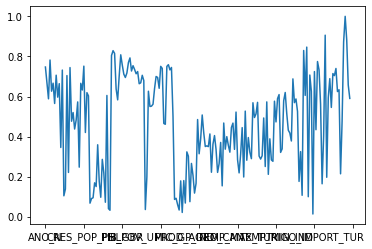

In [ ]:
abs(mat_corr['TRIGO_PRECO']).plot();

Para evitar o overfitting em uma modelo de regressão, o ideal é reduzir ao máximo possível o número de variáveis no dataset que não tenham impacto significativo sobre a variável target.

In [ ]:
mat_corr['TRIGO_PRECO'][abs(mat_corr['TRIGO_PRECO']) < 0.5].shape

(101,)

In [ ]:
mat_corr = df.corr()

## Redução de dimensionalidade - PCA

In [ ]:
from sklearn import decomposition
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Dividindo entradas e saída no dataset
#Y = df['TRIGO_PRECO'].values.reshape(1,-1)
Y = df['TRIGO_PRECO'].values

In [ ]:
Entradas = {}
scaler = MinMaxScaler()

In [ ]:
for i in range(5, 9):
    excluir = mat_corr['TRIGO_PRECO'][abs(mat_corr['TRIGO_PRECO']) < 0.1*i].index
    df_filt = df.drop(columns=excluir)
    
    X = df_filt.drop(columns=['TRIGO_PRECO'], axis=1).values
    X_scaled = scaler.fit_transform(X)
    Entradas[f'Filtro {10*i}%, sem PCA'] = X_scaled
    
    pca95 = decomposition.PCA(n_components=0.95)
    pca95.fit(X_scaled)
    Entradas[f'Filtro {10*i}%, PCA 95%'] = pca95.transform(X_scaled)
    
    pca99 = decomposition.PCA(n_components=0.99)
    pca99.fit(X_scaled)
    Entradas[f'Filtro {10*i}%, PCA 99%'] = pca99.transform(X_scaled)

# Criação dos Modelos de Regressão

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.simplefilter("ignore")

In [ ]:
modelos = {'Regressão Linear': LinearRegression(), 'Ridge': Ridge(), 
           'Lasso': Lasso(), 'ElasticNet': ElasticNet(), 'KNN Regressor': KNeighborsRegressor(),
           'DecisionTree Regressor': DecisionTreeRegressor(), 'SVR': SVR()}

In [ ]:
result = {'Modelo': [], 'Dados': [], 'r2 total': [], 'mse': []}

In [ ]:
for key in modelos:
    for ch in Entradas:
        # Treinando o modelo
        modelos[key].fit(Entradas[ch], Y)
        
        # Fazendo previsões
        Y_pred = modelos[key].predict(Entradas[ch])
        
        # Resultado
        r2 = r2_score(Y, Y_pred)
        mse = mean_squared_error(Y, Y_pred)
        
        #print(f'Modelo: {key}; Dados: {ch}; r2 total: {r2}; mse: {mse}')
        result['Modelo'].append(key)
        result['Dados'].append(ch)
        result['r2 total'].append(r2)
        result['mse'].append(mse)

resultados = pd.DataFrame.from_dict(result)
resultados

,Modelo,Dados,r2 total,mse
0,Regressão Linear,"Filtro 50%, sem PCA",1.000000,1.692575e-29
1,Regressão Linear,"Filtro 50%, PCA 95%",0.858115,3.462582e-01
2,Regressão Linear,"Filtro 50%, PCA 99%",0.945916,1.319874e-01
3,Regressão Linear,"Filtro 60%, sem PCA",1.000000,7.291564e-28
4,Regressão Linear,"Filtro 60%, PCA 95%",0.823279,4.312723e-01
...,...,...,...,...
79,SVR,"Filtro 70%, PCA 95%",0.793549,5.038262e-01
80,SVR,"Filtro 70%, PCA 99%",0.834515,4.038519e-01
81,SVR,"Filtro 80%, sem PCA",0.891840,2.639547e-01
82,SVR,"Filtro 80%, PCA 95%",0.861411,3.382153e-01


In [ ]:
# Excluindo os resultados com r2 = 1, claramente com overfitting
resultados[resultados['r2 total']!=1].sort_values(by='r2 total', ascending=False).head(20)

,Modelo,Dados,r2 total,mse
6,Regressão Linear,"Filtro 70%, sem PCA",0.983018,0.041444
2,Regressão Linear,"Filtro 50%, PCA 99%",0.945916,0.131987
12,Ridge,"Filtro 50%, sem PCA",0.943682,0.137440
14,Ridge,"Filtro 50%, PCA 99%",0.929359,0.172393
15,Ridge,"Filtro 60%, sem PCA",0.923292,0.187200
5,Regressão Linear,"Filtro 60%, PCA 99%",0.921756,0.190949
17,Ridge,"Filtro 60%, PCA 99%",0.906132,0.229078
9,Regressão Linear,"Filtro 80%, sem PCA",0.902365,0.238270
55,KNN Regressor,"Filtro 70%, PCA 95%",0.898881,0.246773
51,KNN Regressor,"Filtro 60%, sem PCA",0.898355,0.248056


In [ ]:
Entradas['Filtro 70%, sem PCA'].shape

(61, 41)

In [ ]:
Entradas['Filtro 60%, PCA 95%'].shape

(61, 6)

In [ ]:
excluir = mat_corr['TRIGO_PRECO'][abs(mat_corr['TRIGO_PRECO']) < 0.7].index
variaveis = df.drop(columns=excluir).columns

In [ ]:
variaveis

Index(['ANO_N', 'AREA_AGRI_CAN', 'AREA_AGRI_FRA', 'AREA_AGRI_PHL',
       'AREA_AGRI_USA', 'CRES_POP_BRA', 'CRES_POP_PHL', 'PIB_AUS', 'PIB_BRA',
       'PIB_CAN', 'PIB_EGY', 'PIB_FRA', 'PIB_GBR', 'PIB_IDN', 'PIB_PHL',
       'PIB_RUS', 'PIB_TUR', 'PIB_USA', 'SI_POV_UMIC_GP_AUS',
       'SI_POV_UMIC_AUS', 'SI_POV_UMIC_GP_BRA', 'SI_POV_UMIC_BRA',
       'SI_POV_UMIC_GP_CHN', 'SI_POV_UMIC_GP_IND', 'SI_POV_UMIC_IND',
       'SI_POV_UMIC_GP_RUS', 'SI_POV_UMIC_RUS', 'SI_POV_UMIC_GP_TUR',
       'SI_POV_UMIC_TUR', 'TRIGO_IMPORT_BRA', 'TRIGO_IMPORT_EGY',
       'TRIGO_IMPORT_IDN', 'TRIGO_IMPORT_TUR', 'TRIGO_IMPORT_USA',
       'TRIGO_IMPORT_DEU', 'TRIGO_IMPORT_TWN', 'TRIGO_PROD_CHN',
       'TRIGO_PROD_EGY', 'TRIGO_PROD_IND', 'PRECO_PETROLEO', 'TRIGO_PRECO',
       'TRIGO_PRECO_T-1'],
      dtype='object')

## Geração de dados sintéticos
Função recebe dataframe e número de períodos igual a 20, itera por suas colunas, extrai a tendência passada e mantém a tendência futura adicionando ruído gaussiano por 20 períodos.

In [ ]:
def gera_dados(df, n):
    df_gerado = pd.DataFrame()
    reg = LinearRegression()
    x_past = df.index.values.reshape(-1, 1)
    x_fut = np.arange(df.shape[0], df.shape[0]+n+1).reshape(-1, 1)
    for col in df.columns:
        reg.fit(x_past, df[col].values)
        trend_past = reg.predict(x_past)
        trend_fut = reg.predict(x_fut)
        sd_noise = (df[col].values - trend_past).std()
        noise = np.random.normal(0, sd_noise, n+1)
        dados_gerados = pd.Series(trend_fut+noise, name=col, index = np.arange(df.shape[0], df.shape[0]+n+1))
        df_gerado = pd.concat([df_gerado, dados_gerados], axis=1)
    
    return df_gerado

In [ ]:
df_ger = gera_dados(df, 15)
df_ger

,ANO_N,AREA_AGRI_AUS,AREA_AGRI_BRA,AREA_AGRI_CAN,AREA_AGRI_CHN,AREA_AGRI_DEU,AREA_AGRI_EGY,AREA_AGRI_FRA,AREA_AGRI_GBR,AREA_AGRI_IDN,AREA_AGRI_IND,AREA_AGRI_PHL,AREA_AGRI_RUS,AREA_AGRI_TUR,AREA_AGRI_USA,CRES_POP_AUS,CRES_POP_BRA,CRES_POP_CAN,CRES_POP_CHN,CRES_POP_DEU,CRES_POP_EGY,CRES_POP_FRA,CRES_POP_GBR,CRES_POP_IDN,CRES_POP_IND,CRES_POP_PHL,CRES_POP_RUS,CRES_POP_TUR,CRES_POP_USA,INFLACAO_AUS,INFLACAO_BRA,INFLACAO_CAN,INFLACAO_CHN,INFLACAO_DEU,INFLACAO_EGY,INFLACAO_FRA,INFLACAO_GBR,INFLACAO_IDN,INFLACAO_IND,INFLACAO_PHL,...,TRIGO_EXPORT_EGY,TRIGO_EXPORT_IND,TRIGO_EXPORT_IDN,TRIGO_EXPORT_PHL,TRIGO_EXPORT_RUS,TRIGO_EXPORT_TUR,TRIGO_EXPORT_GBR,TRIGO_EXPORT_USA,TRIGO_IMPORT_AUS,TRIGO_IMPORT_BRA,TRIGO_IMPORT_CAN,TRIGO_IMPORT_EGY,TRIGO_IMPORT_IND,TRIGO_IMPORT_IDN,TRIGO_IMPORT_PHL,TRIGO_IMPORT_RUS,TRIGO_IMPORT_TUR,TRIGO_IMPORT_GBR,TRIGO_IMPORT_USA,TRIGO_IMPORT_DEU,TRIGO_IMPORT_FRA,TRIGO_IMPORT_HKG,TRIGO_IMPORT_MAC,TRIGO_IMPORT_TWN,TRIGO_IMPORT_CHN,TRIGO_PROD_AUS,TRIGO_PROD_BRA,TRIGO_PROD_CAN,TRIGO_PROD_CHN,TRIGO_PROD_EGY,TRIGO_PROD_IND,TRIGO_PROD_RUS,TRIGO_PROD_TUR,TRIGO_PROD_GBR,TRIGO_PROD_USA,PRECO_PETROLEO,TRIGO_PRECO,TRIGO_PRECO_T-1,TRIGO_PRECO_T-3,TRIGO_PRECO_T-5
61,2022.0,54.413951,31.466698,6.655525,59.609700,47.261164,3.339066,52.663168,73.151587,31.155066,61.380106,42.821477,13.185695,49.609569,45.312754,1.111021,0.562553,1.348507,-0.591960,0.382823,2.135124,0.592640,0.215710,1.119232,0.969514,1.350493,0.024134,1.105287,0.667770,4.609370,993.105461,4.830510,-2.225510,0.272421,16.225835,-2.521712,5.467991,134.604325,5.762630,8.304580,...,259.757556,3236.071644,207.240679,34.324614,27768.142847,4647.829835,409.059798,31121.116871,543.016220,1.209854e+06,15954.622838,2.165520e+06,446320.257734,1.348625e+06,5.650105e+05,-145811.593217,4.882867e+05,591251.209567,4.363428e+05,6.687455e+05,63531.576326,6799.018513,-4.310675,365494.110915,1.259221e+05,27553.991996,4032.126984,36967.970570,143520.610711,9066.717897,105068.912443,64642.162117,19180.388242,6951.498334,63002.413815,50.501722,5.472480,4.391499,4.691690,5.170748
62,2023.0,47.716197,28.993330,6.624522,62.890451,48.106023,4.236814,49.120683,69.439586,30.702871,60.654821,44.444326,13.250223,52.460604,44.476096,1.728340,0.422348,0.793521,0.902938,-0.041877,1.771082,0.558287,0.645859,0.867303,1.008168,1.570839,-0.427776,1.253018,0.717851,3.919197,7.771289,1.595987,0.152732,-0.331623,19.118717,-0.613610,3.475271,184.774774,1.340585,20.339073,...,302.910799,1033.661882,303.353344,58.802880,16146.294119,5059.664408,-5.278436,30828.914475,25164.303795,1.337477e+06,13945.064337,2.430994e+06,-138333.263054,1.322709e+06,1.152297e+06,-119657.438227,1.173867e+06,518280.110707,5.860833e+05,4.775611e+05,190224.556815,-2436.805639,-11.500412,436392.905080,6.846978e+05,25361.460929,5997.206427,29529.744831,152075.079799,8659.554932,103103.557575,83779.936334,21313.410550,10391.100074,59106.919186,46.206906,5.274494,5.286087,6.430282,5.442091
63,2024.0,62.050778,30.092004,6.511821,57.919982,46.917814,3.885667,51.296639,70.093430,34.853103,61.370021,42.024459,13.242379,52.825963,44.542689,0.726236,0.567814,1.275251,0.745764,-0.613361,1.708013,0.423782,0.899419,0.783968,1.147661,1.337811,-0.414739,0.937646,0.548126,-1.453240,-8.753351,-4.223125,5.029810,0.186678,19.406618,2.869397,1.369616,23.799356,8.019586,-0.132915,...,587.910542,1556.175990,324.633760,43.857317,23291.832534,6455.494344,841.791678,41345.364487,6187.245607,1.286908e+06,15242.965048,1.761332e+06,350425.223261,1.707469e+06,1.216484e+06,727149.862881,1.696118e+06,216769.519806,4.246042e+05,1.133618e+06,126870.421910,13378.824532,6.352284,464138.234388,3.852852e+05,27323.855387,7210.144556,30397.707398,153919.280554,9721.854414,106684.507219,82424.415732,22681.671901,2507.245135,68806.651607,58.800246,4.958758,5.679573,5.930963,3.686737
64,2025.0,48.998729,33.707084,6.518183,61.667388,46.328301,3.418452,51.359486,70.909540,33.634272,60.791148,45.505840,13.212742,50.577114,44.190347,1.949577,0.466555,0.661542,0.104247,0.289896

## Plotagem de séries temporais e suas tendências
Função que recebe duas séries temporais, extrai suas tendências e plota as séries e tendências.

In [ ]:
def plot_time_series(serie_past, serie_fut):
    plt.rcParams["figure.figsize"] = [7.50, 3.50]
    plt.rcParams["figure.autolayout"] = True
    
    reg = LinearRegression()
#    reg_fut = LinearRegression()

    x_past = serie_past.index.values.reshape(-1, 1)
    x_fut = serie_fut.index.values.reshape(-1, 1)
    
    reg.fit(x_past, serie_past.values)
#    reg_fut.fit(x_fut, serie_fut.values)
    
    past_trend = pd.Series(reg.predict(x_past), index=serie_past.index)
    fut_trend = pd.Series(reg.predict(x_fut), index=serie_fut.index)

    ax1 = serie_past.plot(color='blue', label='Histórico')
    ax3 = past_trend.plot(color='blue', label='Tendência histórica', linestyle='dashed')
    ax2 = serie_fut.plot(color='red', label='Dados gerados')
    ax4 = fut_trend.plot(color='red', label='Tendência projetada', linestyle='dashed')

    h1, l1 = ax1.get_legend_handles_labels()
#    h2, l2 = ax2.get_legend_handles_labels()
    plt.title(serie_past.name)
    plt.legend(h1, l1, loc=2)

    plt.show()

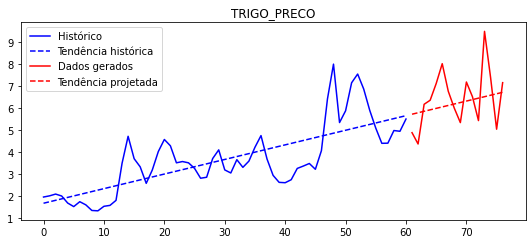

In [ ]:
plot_time_series(df['TRIGO_PRECO'], df_ger['TRIGO_PRECO'])

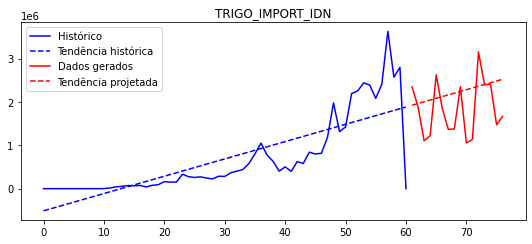

In [ ]:
plot_time_series(df['TRIGO_IMPORT_IDN'], df_ger['TRIGO_IMPORT_IDN'])

In [ ]:
# Tomando as colunas que tenham valor absoluto de correlação maior ou igual 0.8, para verificação dos dados gerados
excluir = mat_corr['TRIGO_PRECO'][abs(mat_corr['TRIGO_PRECO']) < 0.8].index
colunas_selec = df.drop(columns=excluir).columns
colunas_selec

Index(['PIB_AUS', 'PIB_BRA', 'PIB_CAN', 'PIB_FRA', 'TRIGO_IMPORT_BRA',
       'TRIGO_IMPORT_EGY', 'TRIGO_IMPORT_TWN', 'PRECO_PETROLEO', 'TRIGO_PRECO',
       'TRIGO_PRECO_T-1'],
      dtype='object')

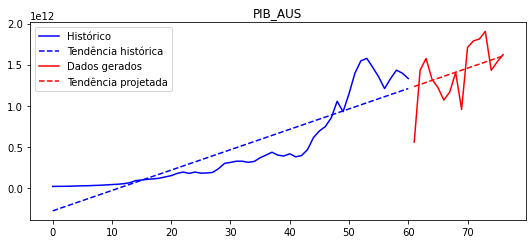

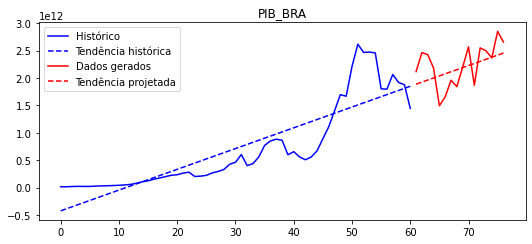

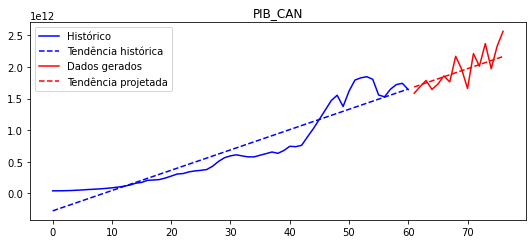

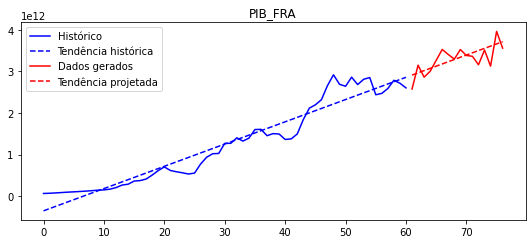

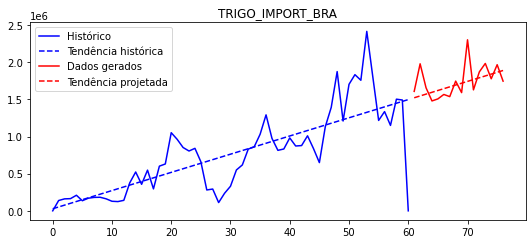

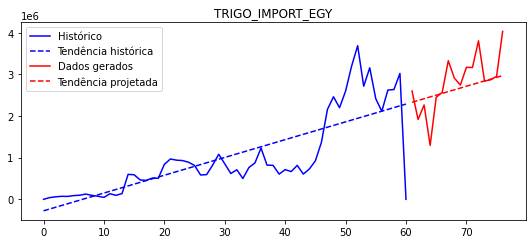

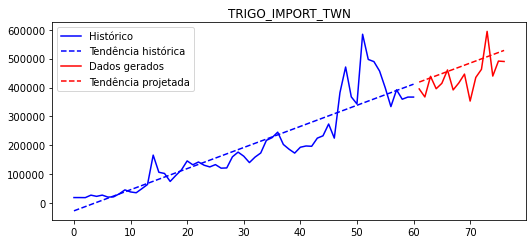

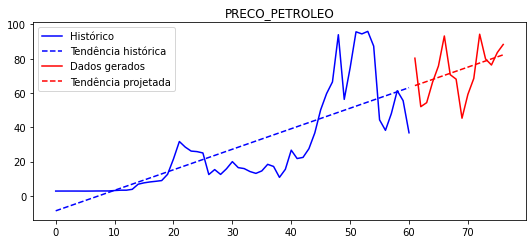

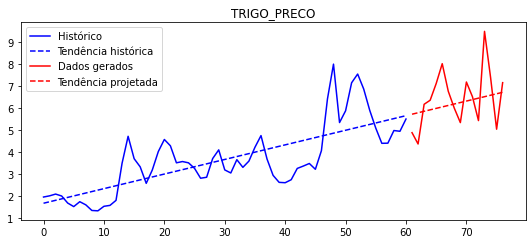

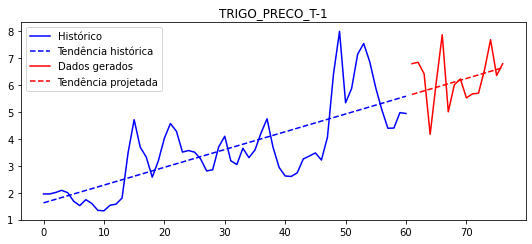

In [ ]:
for col in colunas_selec:
    plot_time_series(df[col], df_ger[col])

In [ ]:
df_ger.to_csv('dados_sinteticos.csv')